Initial Data Loading and Cleaning

In [147]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

In [4]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

#saving data into pandas dataframes 
train = pd.read_csv(path_test)
test = pd.read_csv(path_train)

#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [5]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [62]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

### Preprocessing

Edge detection is a useful image processing technique which reduces the level of noise and number of details in the images so that only the most important features in the images are used for the training of the models. As a result, the canny edge detection is used to perform edge detection before model training. 

In [49]:
#canny edge detection 
def canny_edge_detection(image,sigma):
    #check if numpy contents' data type is uint8, which is required for cv2.Canny 
    if image.dtype != 'uint8':
        #convert image dtype 
        image = np.uint8(image)
    #calculate lower and upper bounds for Canny function 
    md = np.median(image)
    lower = int(max(0,(1 - sigma) * md))
    upper = int(min(255, (1 + sigma) * md))
    #return edges detected 
    return cv2.Canny(image, lower, upper)

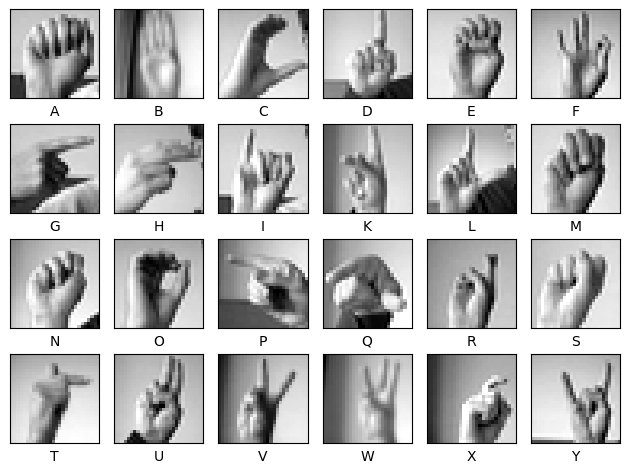

In [63]:
#visualization of dataset 
fix, ax = plt.subplots(8,12)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

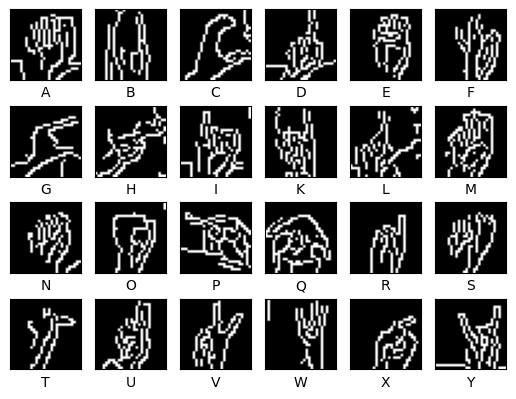

In [70]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(canny_edge_detection(X_train.iloc[idx,:].values.reshape(res),.25),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

Looking at the comparisons between the unprocessed images and the canny-edge-detected images, it is likely that the images are too low of a resolution for edge detection to clearly find the important pixels for the training of the model. However, for the sake of experimentation, the below are datasets contain the images with only the edges. 

INSERT CODE FOR CHANGING DATASET OF IMAGES TO DATASET OF IMAGE EDGES

Standardization and normalization of the data will be computed since each has its advantages in modeling as a preprocessing step. Experiments will be conducted to determine whether standardization or normalization is better for the purposes of this project. 

In [148]:
#normalized data 
X_train_norm = X_train/255 
X_test_norm = X_train/255

#standardized data 
#using sklearn standard scaler model and fitting on training data 
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
